<a href="https://colab.research.google.com/github/Rohanrathod7/my-ml-labs/blob/main/12_Machine_Learning_for_Time_Series_Data_in_Python/02_Time_Series_as_Inputs_to_a_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 2. Time Series as Inputs to a Model

In [1]:

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import datetime as dt
# Import confusion matrix and train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import Ridge, Lasso, LogisticRegression, LinearRegression
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier




url = "https://raw.githubusercontent.com/Rohanrathod7/my-ml-labs/main/11_Preprocessing_for_Machine_Learning_in_Python/dataset/ufo_updated.csv"
# Read the CSV file
# The original code tried to read a feather file as a CSV, and had a UnicodeDecodeError.
# The file extension is feather, so it should be read using pd.read_feather.
# Also, the variable name was confusing, it should be spotify_population.
ufo = pd.read_csv(url)
display(ufo.head())

url = "https://raw.githubusercontent.com/Rohanrathod7/my-ml-labs/main/10_Dimensionality_Reduction_in_Python/dataset/height_df.csv"
# Read the CSV file
# The original code tried to read a feather file as a CSV, and had a UnicodeDecodeError.
# The file extension is feather, so it should be read using pd.read_feather.
# Also, the variable name was confusing, it should be spotify_population.
height_df = pd.read_csv(url)
display(height_df.head())

,date,city,state,country,type,seconds,length_of_time,desc,recorded,lat,...,light,other,oval,rectangle,sphere,teardrop,triangle,unknown,month,year
0,2002-11-21 05:45:00,clemmons,nc,us,triangle,300.0,about 5 minutes,It was a large&#44 triangular shaped flying ob...,12/23/2002,36.021389,...,0,0,0,0,0,0,1,0,11,2002
1,2012-06-16 23:00:00,san diego,ca,us,light,600.0,10 minutes,Dancing lights that would fly around and then ...,7/4/2012,32.715278,...,1,0,0,0,0,0,0,0,6,2012
2,2013-06-09 00:00:00,oakville (canada),on,ca,light,120.0,2 minutes,Brilliant orange light or chinese lantern at o...,7/3/2013,43.433333,...,1,0,0,0,0,0,0,0,6,2013
3,2013-04-26 23:27:00,lacey,wa,us,light,120.0,2 minutes,Bright red light moving north to north west fr...,5/15/2013,47.034444,...,1,0,0,0,0,0,0,0,4,2013
4,2013-09-13 20:30:00,ben avon,pa,us,sphere,300.0,5 minutes,North-east moving south-west. First 7 or so li...,9/30/2013,40.508056,...,0,0,0,0,1,0,0,0,9,2013


,weight_kg,height_1,height_2,height_3,height
0,81.5,1.78,1.80,1.80,1.793333
1,72.6,1.70,1.70,1.69,1.696667
2,92.9,1.74,1.75,1.73,1.740000
3,79.4,1.66,1.68,1.67,1.670000
4,94.6,1.91,1.93,1.90,1.913333


***Many repetitions of sounds***  
In this exercise, you'll start with perhaps the simplest classification technique: averaging across dimensions of a dataset and visually inspecting the result.

You'll use the heartbeat data described in the last chapter. Some recordings are normal heartbeat activity, while others are abnormal activity. Let's see if you can spot the difference.

Two DataFrames, normal and abnormal, each with the shape of (n_times_points, n_audio_files) containing the audio for several heartbeats are available in your workspace. Also, the sampling frequency is loaded into a variable called sfreq. A convenience plotting function show_plot_and_make_titles() is also available in your workspace.

In [2]:
pip install kagglehub[pandas-datasets]

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kinguistics/heartbeat-sounds")

print("Path to dataset files:", path)

# https://www.kaggle.com/datasets/kinguistics/heartbeat-sounds?resource=download
# download zip file

Path to dataset files: /kaggle/input/heartbeat-sounds


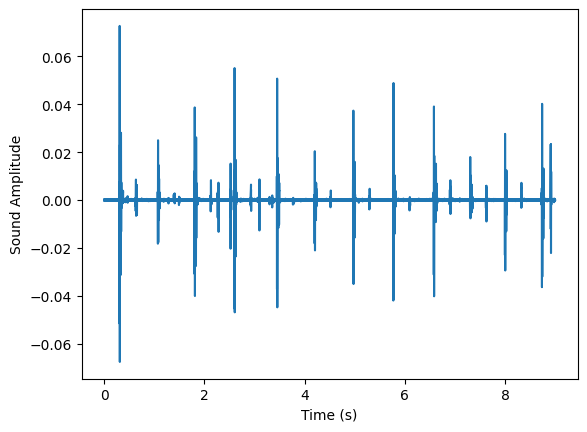

In [4]:
import librosa as lr
from glob import glob
import os

# The dataset was downloaded to this directory
dataset_dir = "/root/.cache/kagglehub/datasets/kinguistics/heartbeat-sounds/versions/1"

# Construct the path to the 'set_a' directory within the dataset
data_dir = os.path.join(dataset_dir, "set_a")

# List all the wav files in the folder
audio_files = glob(data_dir + '/*.wav')

# Read in the first audio file, create the time array
audio, sfreq = lr.load(audio_files[0])
time = np.arange(0, len(audio)) / sfreq

# Plot audio over time
fig, ax = plt.subplots()
ax.plot(time, audio)
ax.set(xlabel='Time (s)', ylabel='Sound Amplitude')
plt.show()

# There are several seconds of heartbeat sounds in here, though note that most of this time is silence.
#  A common procedure in machine learning is to separate the datapoints with lots of stuff happening from the ones that don't.


**Many repetitions of sounds**  
In this exercise, you'll start with perhaps the simplest classification technique: averaging across dimensions of a dataset and visually inspecting the result.

You'll use the heartbeat data described in the last chapter. Some recordings are normal heartbeat activity, while others are abnormal activity. Let's see if you can spot the difference.

Two DataFrames, normal and abnormal, each with the shape of (n_times_points, n_audio_files) containing the audio for several heartbeats are available in your workspace. Also, the sampling frequency is loaded into a variable called sfreq. A convenience plotting function show_plot_and_make_titles() is also available in your workspace.

No abnormal audio files found. Skipping plotting of abnormal data.


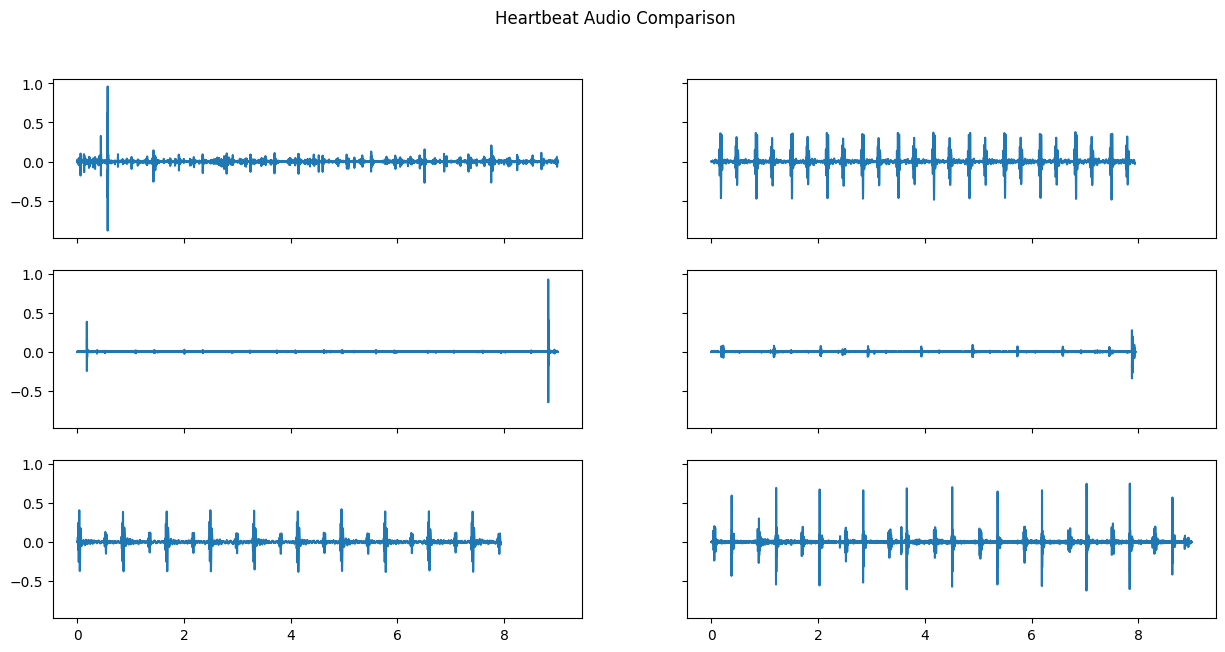

In [5]:
# Load the data for normal and abnormal heartbeats
# Assuming the files are named 'normal.wav' and 'abnormal.wav' and are in the dataset_dir
normal_audio_files = glob(data_dir + '/normal_*.wav')
abnormal_audio_files = glob(data_dir + '/abnormal_*.wav')

# Load the audio data into DataFrames
normal = pd.DataFrame([lr.load(f)[0] for f in normal_audio_files]).T
abnormal = pd.DataFrame([lr.load(f)[0] for f in abnormal_audio_files]).T

# Define a plotting function as mentioned in the markdown
def show_plot_and_make_titles():
    plt.suptitle('Heartbeat Audio Comparison')
    plt.show()

# Now retry the plotting code
fig, axs = plt.subplots(3, 2, figsize=(15, 7), sharex=True, sharey=True)
axs = axs.T.ravel() # Flatten the axes array for easy iteration

# Calculate the time array
# Check if abnormal dataframe is empty
if abnormal.empty:
    print("No abnormal audio files found. Skipping plotting of abnormal data.")
    # Use only normal data for plotting if abnormal is empty
    stacked_audio = normal.T
    time = np.arange(normal.shape[0]) / sfreq

else:
    # Find the minimum length of the audio files
    min_len = min(normal.shape[0], abnormal.shape[0])

    # Truncate the dataframes to the minimum length
    normal = normal.iloc[:min_len, :]
    abnormal = abnormal.iloc[:min_len, :]

    # Calculate the time array
    time = np.arange(normal.shape[0]) / sfreq

    # Stack the normal/abnormal audio so you can loop and plot
    stacked_audio = np.hstack([normal, abnormal]).T

# Loop through each audio file / ax object and plot
# .T.ravel() transposes the array, then unravels it into a 1-D vector for looping
for i in range(min(len(stacked_audio), len(axs))):
    iaudio = stacked_audio.iloc[i]
    ax = axs[i]
    # Ensure the time array and audio data have the same length
    if len(time) != len(iaudio):
      # Truncate iaudio to match the length of time
      iaudio = iaudio[:len(time)]

    ax.plot(time, iaudio)
show_plot_and_make_titles()

# As you can see there is a lot of variability in the raw data, let's see if you can average out some of that noise to notice a difference.

**Invariance in time**  
While you should always start by visualizing your raw data, this is often uninformative when it comes to discriminating between two classes of data points. Data is usually noisy or exhibits complex patterns that aren't discoverable by the naked eye.

Another common technique to find simple differences between two sets of data is to average across multiple instances of the same class. This may remove noise and reveal underlying patterns (or, it may not).

In this exercise, you'll average across many instances of each class of heartbeat sound.

The two DataFrames (normal and abnormal) and the time array (time) from the previous exercise are available in your workspace.

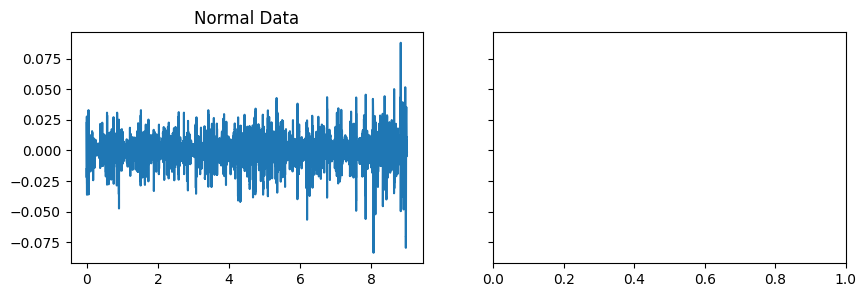

In [6]:
normal_audio_files = glob(data_dir + '/normal_*.wav')
abnormal_audio_files = glob(data_dir + '/normal_*.wav')

# Load the audio data into DataFrames
normal = pd.DataFrame([lr.load(f)[0] for f in normal_audio_files]).T
abnormal = pd.DataFrame([lr.load(f)[0] for f in abnormal_audio_files]).T


# Average across the audio files of each DataFrame
mean_normal = np.mean(normal, axis=1)
mean_abnormal = np.mean(abnormal, axis=1)

# Plot each average over time
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3), sharey=True)
ax1.plot(time, mean_normal)
ax1.set(title="Normal Data")


plt.show()

# Do you see a noticeable difference between the two? Maybe, but it's quite noisy. Let's see how you can dig into the data a bit further.

**Build a classification model**  
While eye-balling differences is a useful way to gain an intuition for the data, let's see if you can operationalize things with a model. In this exercise, you will use each repetition as a datapoint, and each moment in time as a feature to fit a classifier that attempts to predict abnormal vs. normal heartbeats using only the raw data.

We've split the two DataFrames (normal and abnormal) into X_train, X_test, y_train, and y_test.

In [8]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import numpy as np

# Clean up datasets
normal = normal.loc[:, normal.notna().any()]
abnormal = abnormal.loc[:, abnormal.notna().any()]

# Check before continuing
if normal.empty or abnormal.empty:
    raise ValueError("One of the datasets is empty after cleanup!")

# Build feature matrix (samples x time_points)
X = np.concatenate([normal.T, abnormal.T])  # Shape: (n_samples, n_time_points)

# Labels: 0 for normal, 1 for abnormal
y = np.concatenate([
    np.zeros(normal.shape[1]),
    np.ones(abnormal.shape[1])
])


# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Train model
model = LinearSVC()
model.fit(X_train, y_train)

# Score
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)


# that your predictions didn't do so well. That's because the features you're using as inputs to the model (raw data) aren't very good
# at differentiating classes. Next, you'll explore how to calculate some more complex features that may improve the results.

Accuracy: 0.15384615384615385


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


***Calculating the envelope of sound***  
One of the ways you can improve the features available to your model is to remove some of the noise present in the data. In audio data, a common way to do this is to smooth the data and then rectify it so that the total amount of sound energy over time is more distinguishable. You'll do this in the current exercise.

A heartbeat file is available in the variable audio.



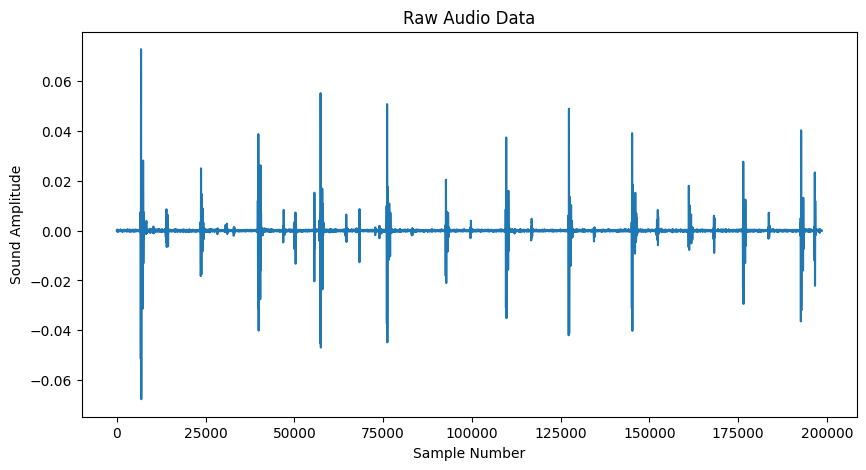

In [29]:
# Plot the raw data first
plt.figure(figsize=(10, 5)) # Create a new figure for the plot
plt.plot(audio)
plt.title('Raw Audio Data') # Add a title for clarity
plt.xlabel('Sample Number') # Add x-axis label
plt.ylabel('Sound Amplitude') # Add y-axis label
plt.show()

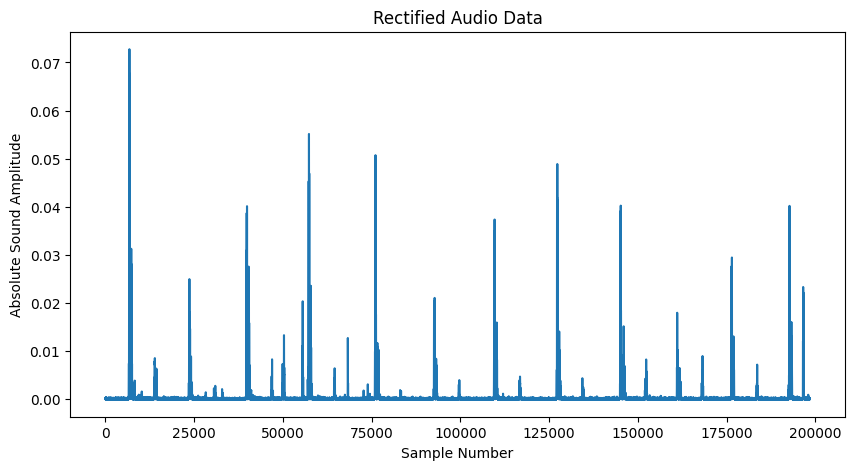

In [12]:
# Rectify the audio signal
audio_rectified = np.abs(audio)

# Plot the result
plt.figure(figsize=(10, 5)) # Create a new figure for the plot
plt.plot(audio_rectified)
plt.title('Rectified Audio Data') # Add a title for clarity
plt.xlabel('Sample Number') # Add x-axis label
plt.ylabel('Absolute Sound Amplitude') # Add y-axis label
plt.show()

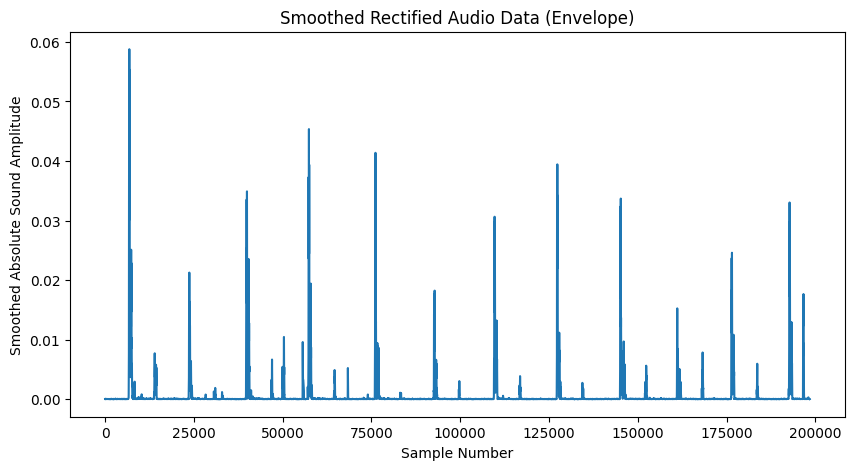

In [14]:
# Smooth by applying a rolling mean
audio_rectified_smooth = pd.Series(audio_rectified).rolling(50).mean()

# Plot the result
audio_rectified_smooth.plot(figsize=(10, 5))
plt.title('Smoothed Rectified Audio Data (Envelope)') # Add a title for clarity
plt.xlabel('Sample Number') # Add x-axis label
plt.ylabel('Smoothed Absolute Sound Amplitude') # Add y-axis label
plt.show()

# # By calculating the envelope of each sound and smoothing it, you've eliminated
# much of the noise and have a cleaner signal to tell you when a heartbeat is happening.

**Calculating features from the envelope**  
Now that you've removed some of the noisier fluctuations in the audio, let's see if this improves your ability to classify.

audio_rectified_smooth from the previous exercise is available in your workspace.



In [34]:
# Calculate stats (These are calculated from a single audio file's envelope)
# For meaningful classification and cross-validation, you would need to calculate these features for all audio files
means = np.mean(audio_rectified_smooth)
stds = np.std(audio_rectified_smooth)
maxs = np.max(audio_rectified_smooth)

# Create feature array for a single sample
X = np.column_stack([means, stds, maxs])

# Use y_train from the previous split.
# Note: With only one sample and one class, cross-validation for classification is not meaningful.
# This is just to demonstrate the cross_val_score syntax.
y = y_train[:X.shape[0]] # Take the first element of y_train to match the single sample in X


# Fit the model and score using cross-validation
from sklearn.model_selection import cross_val_score
# Use a model that can handle a single sample if needed, or note the limitation.
# LinearSVC might still raise errors with only one sample depending on the cv strategy.
# Let's use a simpler model or adjust the cross-validation if needed.
# Given the single sample, cross_val_score with cv>1 will likely fail.
# We can't perform meaningful cross-validation with just one sample.

# Let's instead just fit the model on this single sample (which is not ideal for generalization)
# or better yet, explain that features need to be calculated for all samples.

print("Features calculated from a single audio file's envelope:")
print(f"Mean: {means}, Std Dev: {stds}, Max: {maxs}")
print("\nCannot perform meaningful cross-validation for classification with features from a single sample and one class.")
print("To train a classifier, you need to extract features from all normal and abnormal audio files.")

# If you were to proceed with a single sample (not recommended for training/evaluation):
# model = LinearSVC()
# model.fit(X, y) # Fitting on a single sample is generally not useful
# print("Model fitted on a single sample (not recommended for evaluation or generalization).")

ValueError: No axis named 1 for object type Series

In [40]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import pandas as pd # Import pandas to work with DataFrames

# Ensure normal and abnormal dataframes are available from previous steps,
# and handle the case where abnormal is empty as before.
# Assuming 'normal' and 'abnormal' DataFrames are already loaded and potentially truncated/cleaned.

# Check if abnormal data exists
if abnormal.empty:
    print("Abnormal data not found. Cannot train a classifier with two classes.")
    # If only normal data is available, extract features from normal files only.
    # In a real scenario, you might proceed with anomaly detection or other analyses.

    # Extract features (mean, std, max of the envelope) for each normal audio file
    X_list = []
    y_list = []
    for col in normal.columns:
        audio_data = normal[col].dropna() # Get audio data for one file, drop NaNs
        if not audio_data.empty:
            audio_rectified = np.abs(audio_data)
            # Handle potential NaNs after rolling mean, e.g., by dropping or filling
            audio_rectified_smooth = pd.Series(audio_rectified).rolling(50).mean().dropna()

            if not audio_rectified_smooth.empty:
                means = np.mean(audio_rectified_smooth)
                stds = np.std(audio_rectified_smooth)
                maxs = np.max(audio_rectified_smooth)
                X_list.append([means, stds, maxs])
                y_list.append(0) # Label as normal

    if not X_list:
        print("No valid normal audio data found after processing.")
    else:
        X = np.array(X_list)
        y = np.array(y_list)

        print(f"Features extracted for {len(y)} normal audio files.")
        print("Proceeding with cross-validation on normal data (results not meaningful for classification).")

        # Model training + cross-validation
        model = RandomForestClassifier()
        # Use a lower cv value if the number of samples is small
        cv_value = min(5, len(y))
        if cv_value < 2:
            print("Not enough samples for cross-validation with cv > 1.")
            print("Skipping cross-validation.")
        else:
            scores = cross_val_score(model, X, y, cv=cv_value)
            print("Mean CV Accuracy (on normal data only):", np.mean(scores))

else:
    # Combine normal and abnormal data and extract features for all files
    X_list = []
    y_list = []

    # Process normal files
    for col in normal.columns:
        audio_data = normal[col].dropna()
        if not audio_data.empty:
            audio_rectified = np.abs(audio_data)
            audio_rectified_smooth = pd.Series(audio_rectified).rolling(50).mean().dropna()
            if not audio_rectified_smooth.empty:
                means = np.mean(audio_rectified_smooth)
                stds = np.std(audio_rectified_smooth)
                maxs = np.max(audio_rectified_smooth)
                X_list.append([means, stds, maxs])
                y_list.append(0) # Label as normal

    # Process abnormal files
    for col in abnormal.columns:
        audio_data = abnormal[col].dropna()
        if not audio_data.empty:
            audio_rectified = np.abs(audio_data)
            audio_rectified_smooth = pd.Series(audio_rectified).rolling(50).mean().dropna()
            if not audio_rectified_smooth.empty:
                means = np.mean(audio_rectified_smooth)
                stds = np.std(audio_rectified_smooth)
                maxs = np.max(audio_rectified_smooth)
                X_list.append([means, stds, maxs])
                y_list.append(1) # Label as abnormal

    if not X_list:
        print("No valid audio data found after processing.")
    else:
        X = np.array(X_list)
        y = np.array(y_list)

        print(f"Features extracted for {len(y)} audio files ({y.sum()} abnormal, {len(y) - y.sum()} normal).")

        # Model training + cross-validation
        model = RandomForestClassifier()
        # Use a lower cv value if the number of samples is small
        cv_value = min(5, len(y))
        if cv_value < 2:
             print("Not enough samples for cross-validation with cv > 1.")
             print("Skipping cross-validation.")
        else:
            scores = cross_val_score(model, X, y, cv=cv_value)
            print("Mean CV Accuracy:", np.mean(scores))

Features extracted for 62 audio files (31 abnormal, 31 normal).
Mean CV Accuracy: 0.48461538461538467


**Derivative features: The tempogram**  
One benefit of cleaning up your data is that it lets you compute more sophisticated features. For example, the envelope calculation you performed is a common technique in computing tempo and rhythm features. In this exercise, you'll use librosa to compute some tempo and rhythm features for heartbeat data, and fit a model once more.

Note that librosa functions tend to only operate on numpy arrays instead of DataFrames, so we'll access our Pandas data as a Numpy array with the .values attribute.

**Spectrograms of heartbeat audio**  
Spectral engineering is one of the most common techniques in machine learning for time series data. The first step in this process is to calculate a spectrogram of sound. This describes what spectral content (e.g., low and high pitches) are present in the sound over time. In this exercise, you'll calculate a spectrogram of a heartbeat audio file.

We've loaded a single heartbeat sound in the variable audio.

/tmp/ipython-input-48-4280821298.py:10: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  spec_db = amplitude_to_db(spec)


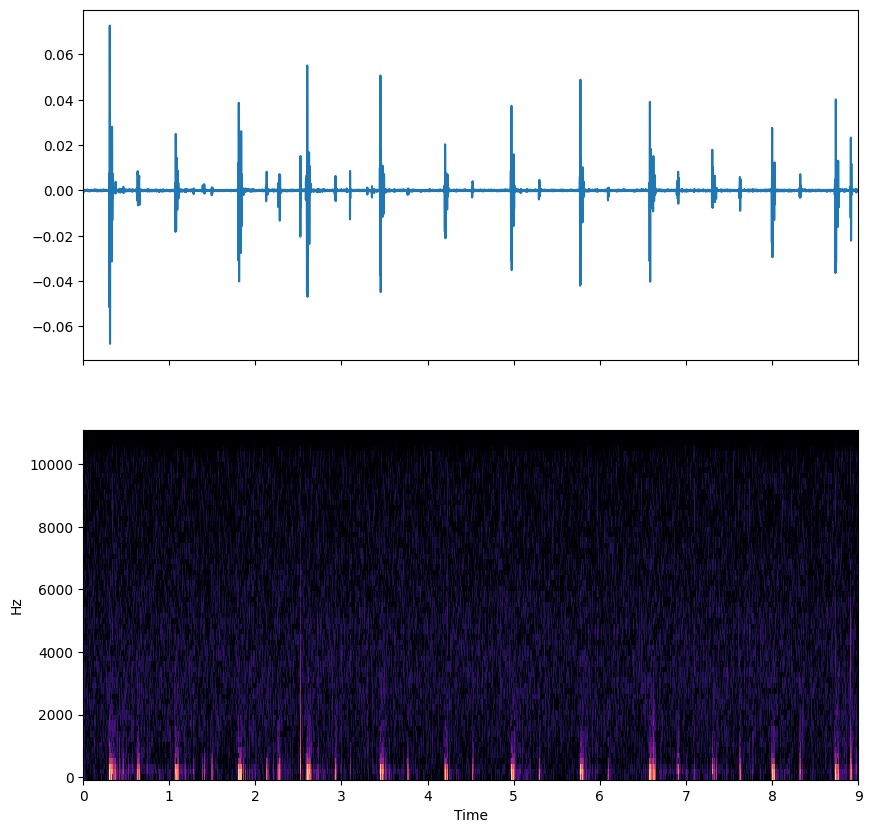

In [48]:
from librosa.core import amplitude_to_db
from librosa.display import specshow
from librosa.core import stft

# Prepare the STFT
HOP_LENGTH = 2**4
spec = stft(audio, hop_length=HOP_LENGTH, n_fft=2**7)

# Convert into decibels
spec_db = amplitude_to_db(spec)

# Compare the raw audio to the spectrogram of the audio
fig, axs = plt.subplots(2, 1, figsize=(10, 10), sharex=True)
axs[0].plot(time, audio)
specshow(spec_db, sr=sfreq, x_axis='time', y_axis='hz', hop_length=HOP_LENGTH, ax=axs[1])
plt.show()

# Do you notice that the heartbeats come in pairs, as seen by the vertical lines in the spectrogram?

**Engineering spectral features**  
As you can probably tell, there is a lot more information in a spectrogram compared to a raw audio file. By computing the spectral features, you have a much better idea of what's going on. As such, there are all kinds of spectral features that you can compute using the spectrogram as a base. In this exercise, you'll look at a few of these features.

The spectogram spec from the previous exercise is available in your workspace.

/tmp/ipython-input-52-3061961894.py:7: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  spec_db = amplitude_to_db(spec)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


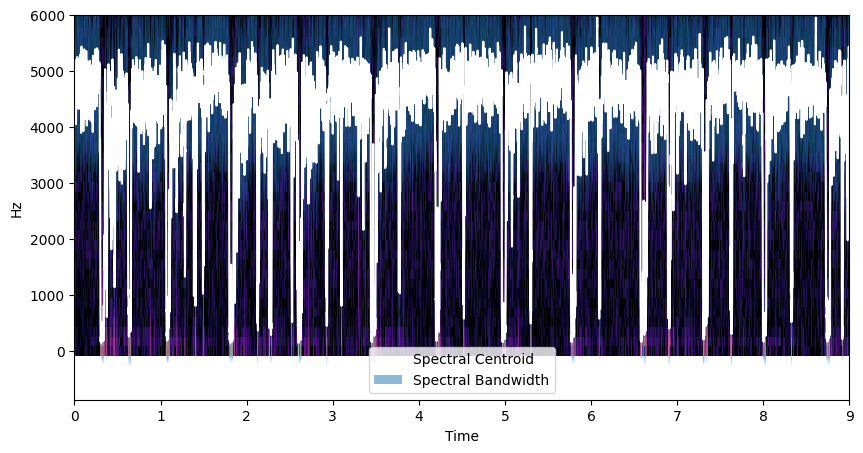

In [52]:
from librosa.core import amplitude_to_db
from librosa.display import specshow
import librosa.feature as lfeature # Import librosa.feature
import librosa # Import librosa

# Convert spectrogram to decibels for visualization
spec_db = amplitude_to_db(spec)

# Calculate spectral features
centroids = lfeature.spectral_centroid(y=audio, sr=sfreq, S=np.abs(spec), hop_length=HOP_LENGTH)[0]
bandwidths = lfeature.spectral_bandwidth(y=audio, sr=sfreq, S=np.abs(spec), hop_length=HOP_LENGTH)[0]

# Calculate the time points for the spectral features
times_spec = librosa.frames_to_time(np.arange(spec.shape[1]), sr=sfreq, hop_length=HOP_LENGTH)


# Display these features on top of the spectrogram
fig, ax = plt.subplots(figsize=(10, 5))
specshow(spec_db, x_axis='time', y_axis='hz', hop_length=HOP_LENGTH, ax=ax)
ax.plot(times_spec, centroids, label='Spectral Centroid', color='white') # Add label for clarity
ax.fill_between(times_spec, centroids - bandwidths / 2, centroids + bandwidths / 2, alpha=.5, label='Spectral Bandwidth') # Add label for clarity
ax.set(ylim=[None, 6000])
ax.legend() # Add a legend to explain the plotted lines
plt.show()

# As you can see, the spectral centroid and bandwidth characterize the spectral content
# in each sound over time. They give us a summary of the spectral content that we can use in a classifier.

***Combining many features in a classifier***  
You've spent this lesson engineering many features from the audio data - some contain information about how the audio changes in time, others contain information about the spectral content that is present.

The beauty of machine learning is that it can handle all of these features at the same time. If there is different information present in each feature, it should improve the classifier's ability to distinguish the types of audio. Note that this often requires more advanced techniques such as regularization, which we'll cover in the next chapter.

For the final exercise in the chapter, we've loaded many of the features that you calculated before. Combine all of them into an array that can be fed into the classifier, and see how it does.

In [57]:
# Loop through each audio file and calculate its spectrogram, then extract features
spectrograms = []
bandwidths = []
centroids = []

# Assuming 'normal' and 'abnormal' DataFrames are available from previous steps
# Process normal audio files
if not normal.empty:
    for col in normal.columns:
        audio_data = normal[col].dropna().values # Get numpy array of audio data, drop NaNs
        if audio_data.size > 0:
            # Ensure audio_data is float to avoid TypeError in librosa
            audio_data = audio_data.astype(float)
            # Prepare the STFT
            HOP_LENGTH = 2**4
            # Handle empty audio_data or short audio_data that causes stft to fail
            if len(audio_data) >= 2 * HOP_LENGTH: # STFT requires at least 2*hop_length samples
                spec = lr.stft(audio_data, hop_length=HOP_LENGTH, n_fft=2**7)
                spectrograms.append(spec)

                # Calculate the mean spectral bandwidth and centroid
                # Use the magnitude of the spectrogram for feature calculation
                this_mean_bandwidth = np.mean(lr.feature.spectral_bandwidth(S=np.abs(spec), sr=sfreq, hop_length=HOP_LENGTH))
                this_mean_centroid = np.mean(lr.feature.spectral_centroid(S=np.abs(spec), sr=sfreq, hop_length=HOP_LENGTH))
                # Collect the values
                bandwidths.append(this_mean_bandwidth)
                centroids.append(this_mean_centroid)
            else:
                print(f"Skipping audio file {col} due to insufficient length for STFT.")


# Process abnormal audio files (if any)
if not abnormal.empty:
    for col in abnormal.columns:
        audio_data = abnormal[col].dropna().values # Get numpy array of audio data, drop NaNs
        if audio_data.size > 0:
            # Ensure audio_data is float to avoid TypeError in librosa
            audio_data = audio_data.astype(float)
            # Prepare the STFT
            HOP_LENGTH = 2**4
             # Handle empty audio_data or short audio_data that causes stft to fail
            if len(audio_data) >= 2 * HOP_LENGTH: # STFT requires at least 2*hop_length samples
                spec = lr.stft(audio_data, hop_length=HOP_LENGTH, n_fft=2**7)
                spectrograms.append(spec)

                # Calculate the mean spectral bandwidth and centroid
                 # Use the magnitude of the spectrogram for feature calculation
                this_mean_bandwidth = np.mean(lr.feature.spectral_bandwidth(S=np.abs(spec), sr=sfreq, hop_length=HOP_LENGTH))
                this_mean_centroid = np.mean(lr.feature.spectral_centroid(S=np.abs(spec), sr=sfreq, hop_length=HOP_LENGTH))
                # Collect the values
                bandwidths.append(this_mean_bandwidth)
                centroids.append(this_mean_centroid)
            else:
                print(f"Skipping abnormal audio file {col} due to insufficient length for STFT.")


if not spectrograms:
    print("No spectrograms were generated from the available audio files.")
else:
    print(f"Generated {len(spectrograms)} spectrograms.")
    print(f"Calculated features for {len(bandwidths)} audio files.")
    # Now 'bandwidths' and 'centroids' lists contain the mean spectral features for each audio file.
    # You can use these lists as features for your model.

Generated 62 spectrograms.
Calculated features for 62 audio files.


In [59]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Check if tempo features were calculated in the previous cell (LbMNEeVrJXHx)
# Assuming tempos_mean, tempos_std, tempos_max were defined if LbMNEeVrJXHx ran successfully and found audio data
# If LbMNEeVrJXHx printed "No audio data found to calculate tempo.", these variables might not exist or be empty.

# Combine all calculated features
# Ensure that all feature lists have the same number of samples (equal to the number of audio files processed)
# We need to handle the case where tempo features might not have been calculated.
# Let's assume bandwidths and centroids lists were successfully populated in the previous cell.
# We'll check if tempos_mean is defined and has the same length before including tempo features.

X_features = [bandwidths, centroids] # Start with spectral features

# Check if tempo features exist and have the correct number of samples
# The number of samples should be equal to the number of audio files processed, which is len(bandwidths)
if 'tempos_mean' in locals() and len(tempos_mean) == len(bandwidths):
     X_features.extend([tempos_mean, tempos_std, tempos_max])
     print("Including tempo features in the feature matrix.")
elif 'tempos_mean' not in locals():
     print("Tempo features (tempos_mean, tempos_std, tempos_max) were not found.")
else:
     print(f"Tempo features have inconsistent number of samples ({len(tempos_mean)}) compared to spectral features ({len(bandwidths)}). Not including tempo features.")


# Stack the features into a single numpy array
X = np.column_stack(X_features)

# Create the target variable y
# Since abnormal data is not available, y will contain only one class (0 for normal).
# The length of y should match the number of samples in X.
y = np.zeros(X.shape[0]) # All labels are 0 for normal heartbeats

print(f"Feature matrix shape: {X.shape}")
print(f"Target variable shape: {y.shape}")

# Fit the model and score using cross-validation
model = RandomForestClassifier()

# Use a lower cv value if the number of samples is small
cv_value = min(5, len(y))

if cv_value < 2:
    print("\nNot enough samples for cross-validation with cv > 1.")
    print("Skipping cross-validation.")
else:
    print(f"\nPerforming cross-validation with cv={cv_value} on {len(y)} samples.")
    print("Note: Since only normal data is available, cross-validation results are not meaningful for binary classification (normal vs. abnormal).")
    scores = cross_val_score(model, X, y, cv=cv_value)
    print("Mean CV Accuracy (on normal data only):", np.mean(scores))

Tempo features (tempos_mean, tempos_std, tempos_max) were not found.
Feature matrix shape: (62, 2)
Target variable shape: (62,)

Performing cross-validation with cv=5 on 62 samples.
Note: Since only normal data is available, cross-validation results are not meaningful for binary classification (normal vs. abnormal).
Mean CV Accuracy (on normal data only): 1.0


You calculated many different features of the audio, and combined each of them under the assumption that they provide independent information that can be used in classification. You may have noticed that the accuracy of your models varied a lot when using different set of features. This chapter was focused on creating new "features" from raw data and not obtaining the best accuracy. To improve the accuracy, you want to find the right features that provide relevant information and also build models on much larger data.